Simple Analysis on Student Grade(https://www.kaggle.com/dipam7/student-grade-prediction)

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [34]:
dataset = pd.read_csv('student-mat.csv')
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [35]:
print('Total number of students: ', len(dataset))

Total number of students:  395


In [36]:
dataset['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

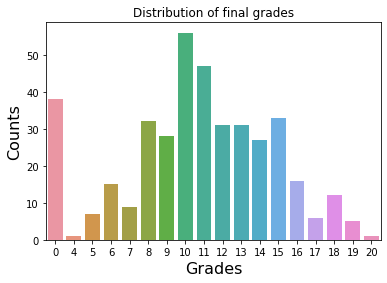

In [37]:
dist = sns.countplot(x=dataset['G3'])
dist.axes.set_title('Distribution of final grades')
dist.set_xlabel('Grades', fontsize=16)
dist.set_ylabel('Counts', fontsize=16)
plt.show()

In [38]:
dataset.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [39]:
num_males = len(dataset[dataset['sex'] == 'M'])
num_females = len(dataset[dataset['sex'] == 'F'])
print('Number of males: ', num_males)
print('Number of females: ', num_females)

Number of males:  187
Number of females:  208


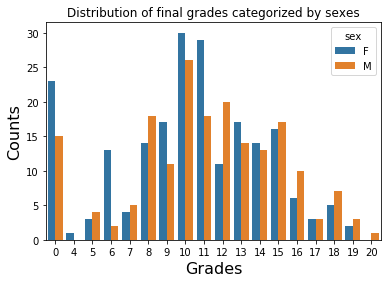

In [40]:
dist_sex = sns.countplot(x='G3', hue='sex', data=dataset)
dist_sex.axes.set_title('Distribution of final grades categorized by sexes')
dist_sex.set_xlabel('Grades', fontsize = 16)
dist_sex.set_ylabel('Counts', fontsize = 16)
plt.show()

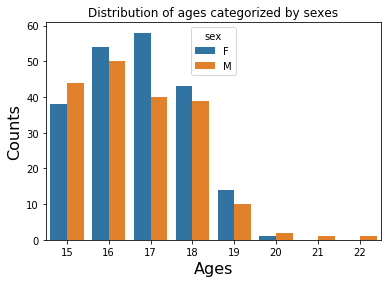

In [41]:
dist_age = sns.countplot(x='age', hue='sex', data=dataset)
dist_age.axes.set_title('Distribution of ages categorized by sexes')
dist_age.set_xlabel('Ages', fontsize = 16)
dist_age.set_ylabel('Counts', fontsize = 16)
plt.show()

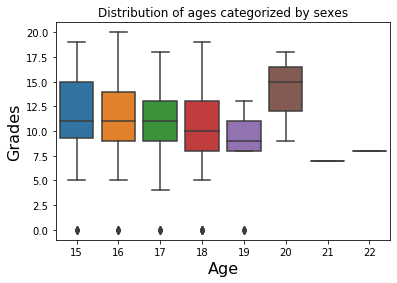

In [42]:
age_grade = sns.boxplot(x='age', y='G3', data=dataset)
age_grade.axes.set_title('Distribution of ages categorized by sexes')
age_grade.set_xlabel('Age', fontsize = 16)
age_grade.set_ylabel('Grades', fontsize = 16)
plt.show()

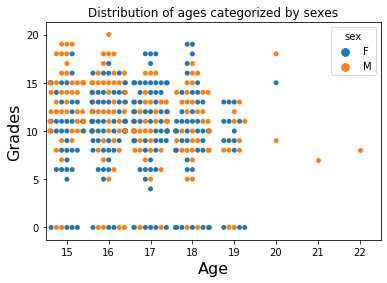

In [43]:
age_grade_sex = sns.swarmplot(x='age', y='G3', hue='sex', data=dataset)
age_grade_sex.axes.set_title('Distribution of ages categorized by sexes')
age_grade_sex.set_xlabel('Age', fontsize = 16)
age_grade_sex.set_ylabel('Grades', fontsize = 16)
plt.show()

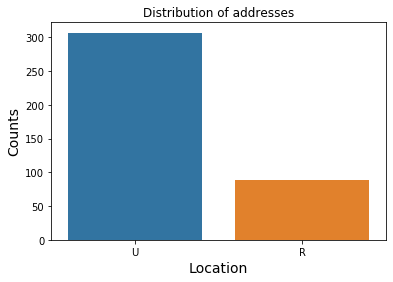

In [44]:
location_dist = sns.countplot(dataset['address'])
location_dist.axes.set_title('Distribution of addresses')
location_dist.set_xlabel('Location', fontsize = 14)
location_dist.set_ylabel('Counts', fontsize = 14)
plt.show()

In [45]:
dataset.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [46]:
labels = dataset['G3']

dataset.drop(['school', 'G1', 'G2'], axis=1, inplace=True)
    
dataset = pd.get_dummies(dataset)

most_correlated = dataset.corr().abs()['G3'].sort_values(ascending=False)

most_correlated = most_correlated[:9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

In [48]:
most_correlated.index

Index(['G3', 'failures', 'Medu', 'higher_yes', 'higher_no', 'age', 'Fedu',
       'goout', 'romantic_no'],
      dtype='object')

In [49]:
student = dataset.loc[:, most_correlated.index]
student.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
0,6,0,4,1,0,18,4,4,1
1,6,0,1,1,0,17,1,3,1
2,10,3,1,1,0,15,1,2,1
3,15,0,4,1,0,15,2,2,0
4,10,0,3,1,0,16,3,2,1


In [54]:
len(dataset[dataset['Medu'] + dataset['Fedu'] == 1])

2

Text(0, 0.5, 'Grades')

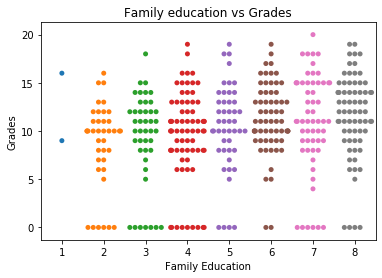

In [55]:
family_ed = dataset['Medu'] + dataset['Fedu']
sns.swarmplot(x=family_ed, y=dataset['G3'])
plt.title('Family education vs Grades')
plt.xlabel('Family Education')
plt.ylabel('Grades')

Text(0, 0.5, 'Grades')

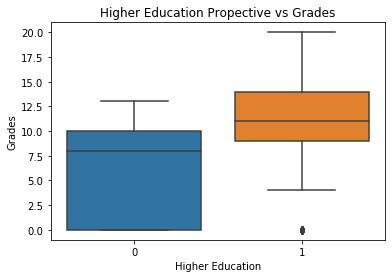

In [57]:
dataset.drop(['higher_no'], axis=1)
sns.boxplot(x=dataset['higher_yes'], y=dataset['G3'])
plt.title('Higher Education Propective vs Grades')
plt.xlabel('Higher Education')
plt.ylabel('Grades')

In [58]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [60]:
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression',
                      'Random Forest','SVM', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model3 = RandomForestRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model3, model5]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae, rmse = evaluate_predictions(predictions, y_test)
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [62]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.25, random_state=42)

results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,3.41944,4.27561
Random Forest,3.00465,3.75484
SVM,3.50899,4.38375
Baseline,3.78788,4.82523
